In [ ]:
import networkx as nx
import nxviz as nv
from nxviz import annotate, highlights
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import osmnx as ox

## REQUISITO 1

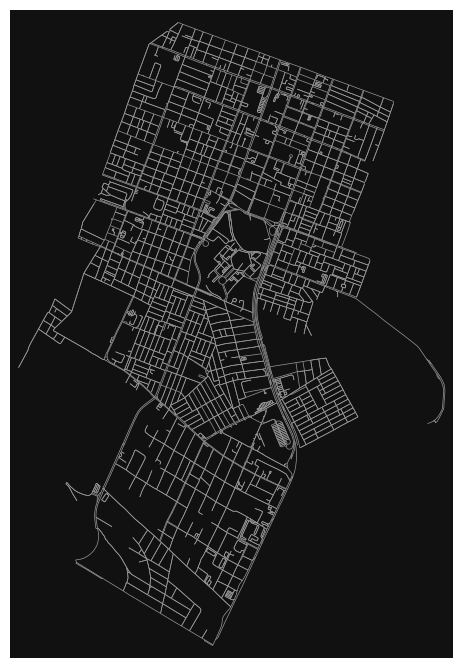

In [67]:
places = ["Lagoa Nova, Natal, Rio Grande do Norte, Brasil",
          "Candelária, Natal, Rio Grande do Norte, Brasil",
          "Mirassol, Natal, Rio Grande do Norte, Brasil"]

G = ox.graph_from_place(places, network_type="bike")
remove = ox.graph_from_place("Universidade Federal do Rio Grande do Norte", network_type="bike")
G.remove_nodes_from(list(remove.nodes()))
G.remove_edges_from(list(remove.edges()))

fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, show=False, close=False)

In [22]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"O número de nós em G é: {num_nodes}")
print(f"O número de arestas em G é: {num_edges}")

O número de nós em G é: 2914
O número de arestas em G é: 6915


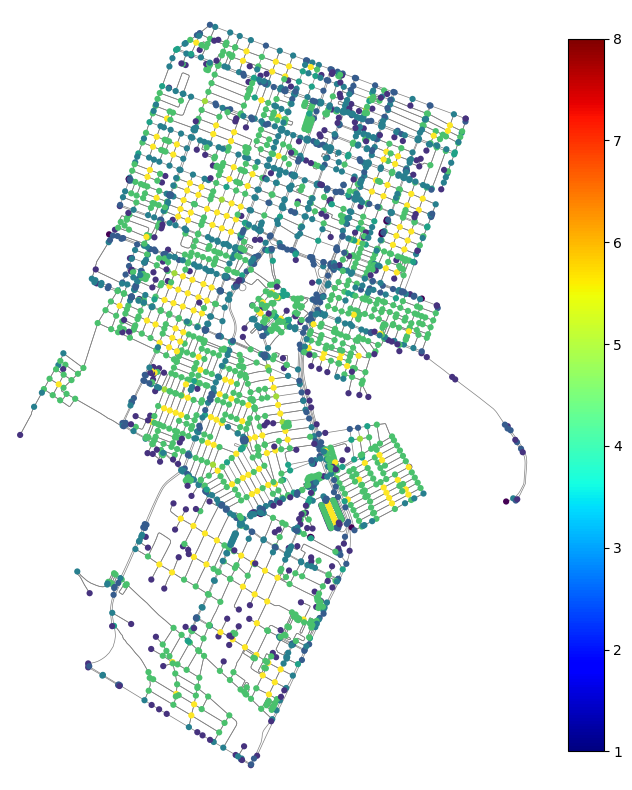

In [38]:
# Obtém o grau de cada nó para definir a cor dos nós
degree_dict = dict(G.degree())
node_colors = [degree_dict[node] for node in G.nodes()]

# Define a figura e os eixos para o grafo
fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=20,
    node_zorder=2,
    edge_linewidth=0.5,
    edge_color="gray",
    bgcolor="white",
    show=False,
    close=False,
    figsize=(10, 10)
)

# Define um ScalarMappable para a barra de cores usando o mesmo cmap "jet"
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessário para o ScalarMappable

# Adiciona a barra de cores à visualização
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)

plt.show()


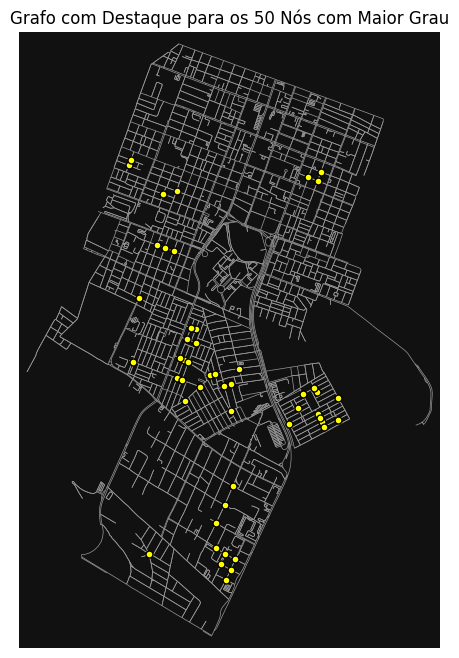

In [36]:
degree_centrality = nx.degree_centrality(G)

top_50_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:50]

# Plotar o grafo completo
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, show=False, close=False)

# Adicionar círculos vermelhos ao redor dos 50 nós com maior grau
for node in top_50_nodes:
    x, y = G.nodes[node]['x'], G.nodes[node]['y']
    ax.scatter(x, y, s=25, c='yellow', edgecolor='black', zorder=5)

plt.title("Grafo com Destaque para os 50 Nós com Maior Grau")
plt.show()

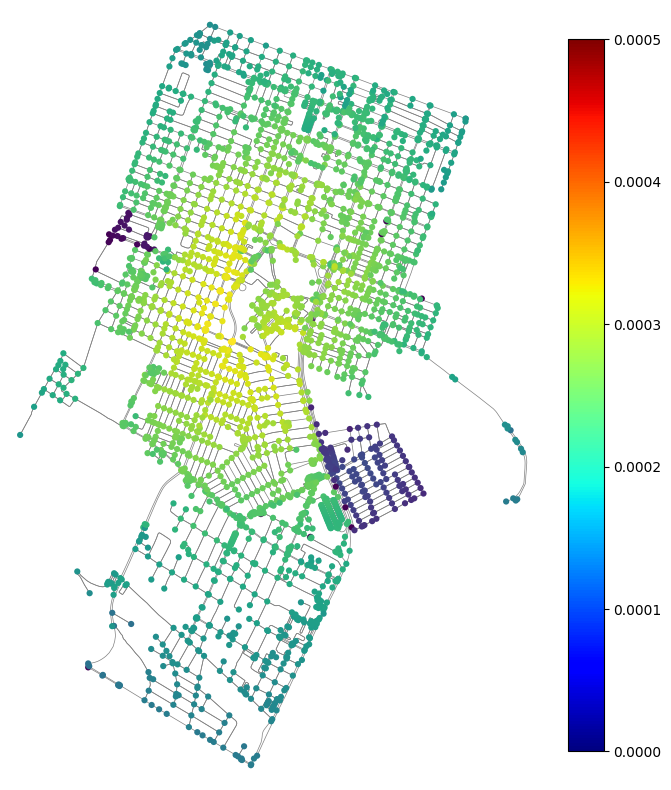

In [40]:
# Calcula a centralidade de proximidade ponderada pelo comprimento das arestas
closeness_dict = nx.closeness_centrality(G, distance='length')
node_colors = [closeness_dict[node] for node in G.nodes()]

# Define a figura e os eixos para o grafo com coloração baseada na centralidade de proximidade
fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=20,
    node_zorder=2,
    edge_linewidth=0.5,
    edge_color="gray",
    bgcolor="white",
    show=False,
    close=False,
    figsize=(10, 10)
)

# Define um ScalarMappable para a barra de cores usando o mesmo cmap "jet"
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessário para o ScalarMappable

# Adiciona a barra de cores à visualização
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)

plt.show()


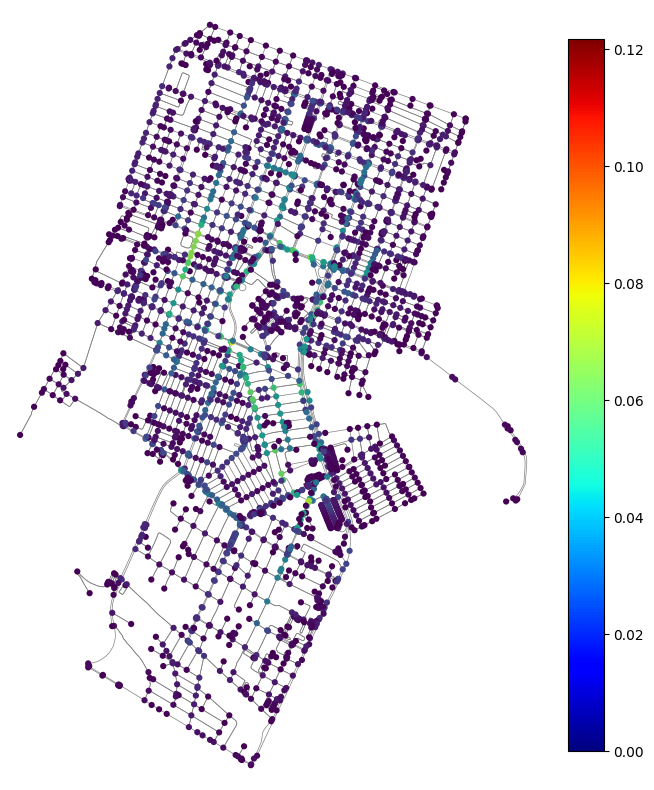

In [42]:
# Calcula a centralidade de intermediação ponderada pelo comprimento das arestas
betweenness_dict = nx.betweenness_centrality(G, weight='length', normalized=True)
node_colors = [betweenness_dict[node] for node in G.nodes()]

# Define a figura e os eixos para o grafo com coloração baseada na centralidade de intermediação
fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=20,
    node_zorder=2,
    edge_linewidth=0.5,
    edge_color="gray",
    bgcolor="white",
    show=False,
    close=False,
    figsize=(10, 10)
)

# Define um ScalarMappable para a barra de cores usando o mesmo cmap "jet"
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessário para o ScalarMappable

# Adiciona a barra de cores à visualização
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)

plt.show()


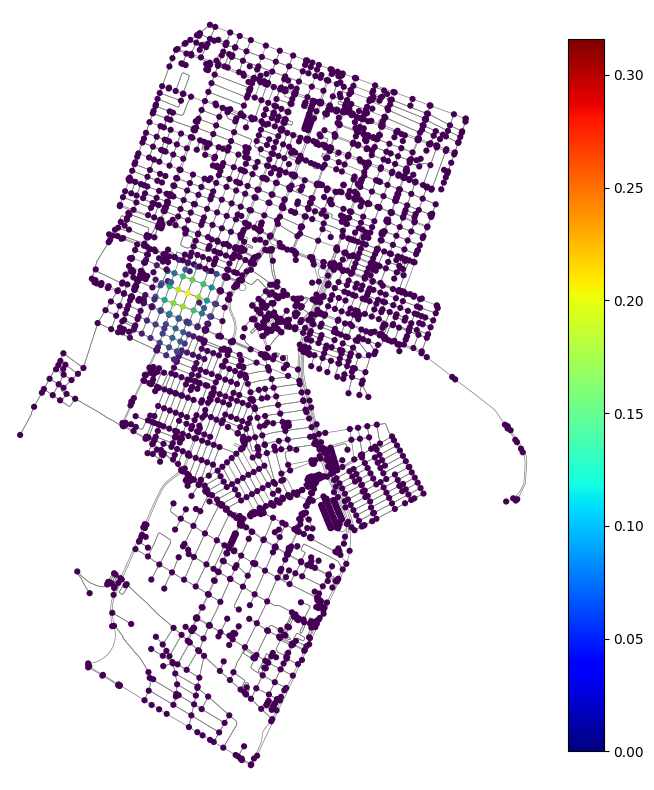

In [56]:
# Calcula a centralidade de vetor próprio usando a implementação que suporta multigraphs
eigenvector_dict = nx.eigenvector_centrality_numpy(G, max_iter=1000)
node_colors = [eigenvector_dict[node] for node in G.nodes()]

# Define a figura e os eixos para o grafo com coloração baseada na centralidade de vetor próprio
fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=20,
    node_zorder=2,
    edge_linewidth=0.5,
    edge_color="gray",
    bgcolor="white",
    show=False,
    close=False,
    figsize=(10, 10)
)

# Define um ScalarMappable para a barra de cores usando o mesmo cmap "jet"
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessário para o ScalarMappable

# Adiciona a barra de cores à visualização
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)

plt.show()


## REQUISITO 2

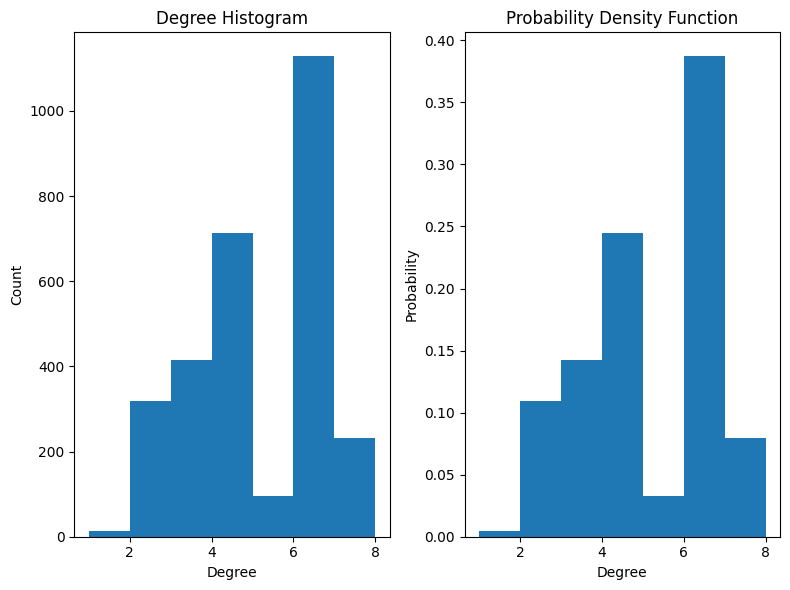

In [57]:

plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

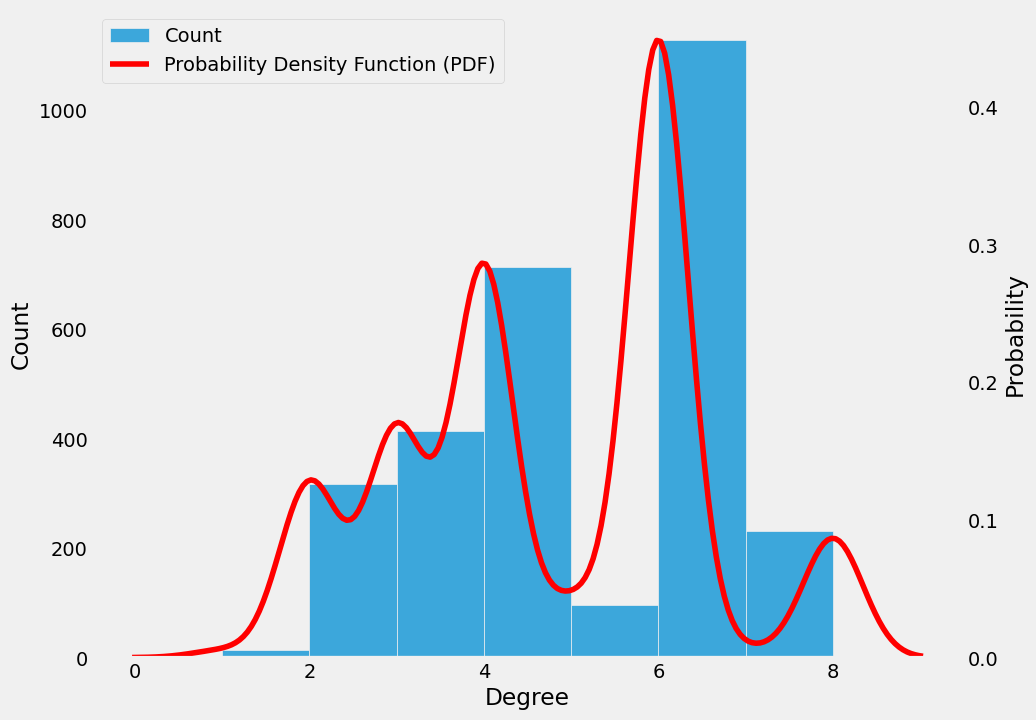

In [ ]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

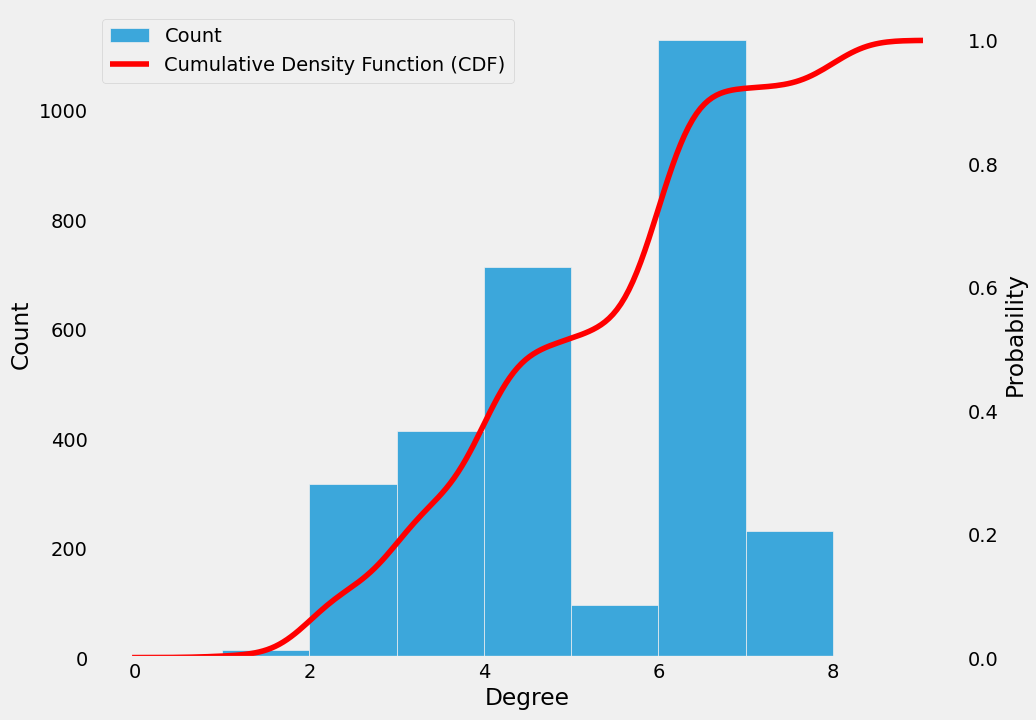

In [ ]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

## REQUSITO 3

In [61]:
bc = pd.Series(nx.betweenness_centrality(G))
dc = pd.Series(nx.degree_centrality(G))
ec = pd.Series(nx.eigenvector_centrality_numpy(G, max_iter=1000))
cc = pd.Series(nx.closeness_centrality(G))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.108656,0.001030,6.254833e-10,0.034112
1,0.000000,0.000343,-2.370725e-18,0.000000
2,0.004254,0.002060,2.545727e-07,0.027474
3,0.010045,0.002060,8.628640e-07,0.028936
4,0.024594,0.001030,5.643744e-08,0.036863


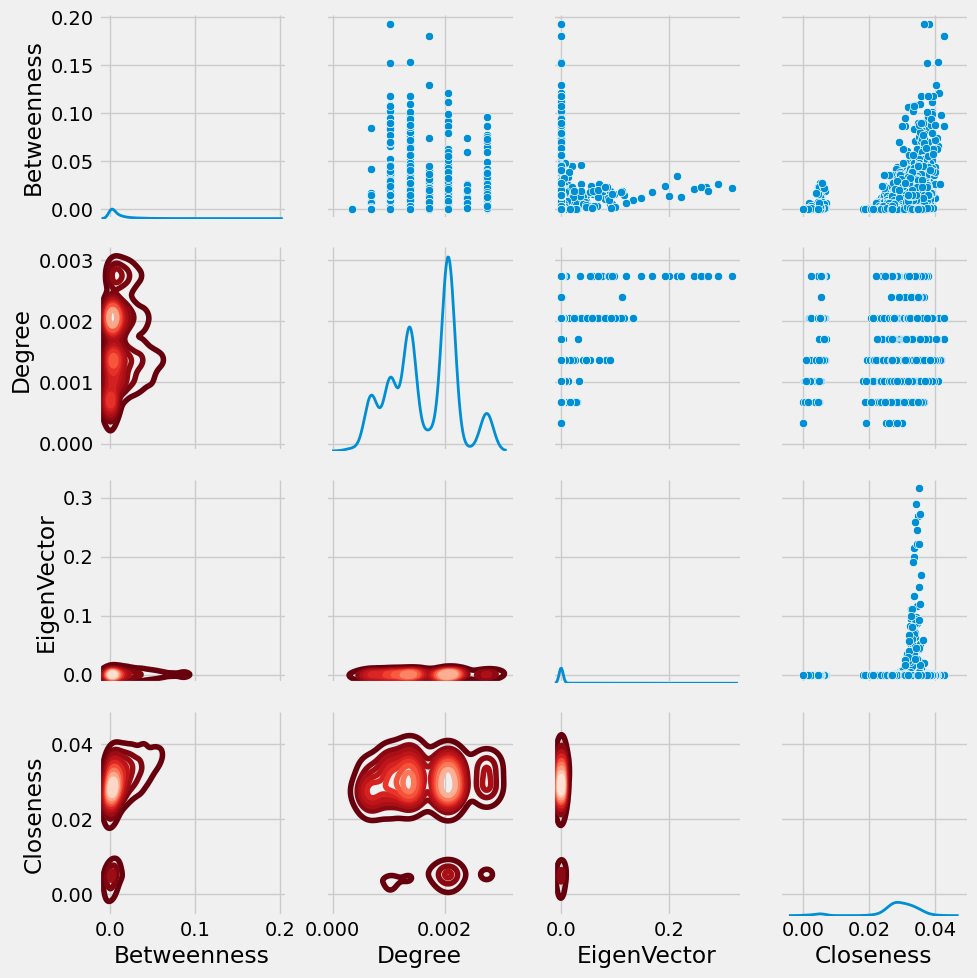

In [62]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

## REQUISITO 4

In [68]:
# Convert the multigraph to a simple graph
G_simple = nx.Graph(G)
G_simple.remove_edges_from(nx.selfloop_edges(G))

# Calculate the core numbers for the simple graph
core_numbers = nx.core_number(G_simple)

# Get the unique core numbers
set(core_numbers.values())

{1, 2}

In [70]:
core = 2
for i in nx.k_core(G_simple,core):
  print(i)

300389746
491803098
491803099
500966709
500966724
500966725
500966743
500968839
500968847
500968850
500968851
500973563
500973601
500973633
500973648
500973663
500973670
500973689
501013499
501013505
501033725
501033762
501087374
501087462
501087579
501152643
501152645
501152685
501620424
501698821
501698871
501699111
501699115
501699199
501784980
501785122
501791672
501791690
501791797
501791803
501791817
501791821
501791829
501791836
501793796
501824593
501824595
501824596
501824600
501824620
501824628
501824630
501824654
501824659
501824662
501824666
501824676
501824706
501834689
501834691
501834692
501834693
501834694
501834695
501834696
501834697
501834698
501834699
501834700
501834701
501834702
501834704
501834705
501834706
501834707
501834708
501834710
501834711
501834713
501834714
501834715
501834716
501834719
501834720
501834721
501834722
501834724
501834726
501834727
501834728
501834729
501834730
501834732
501834733
501834734
501834735
501834736
501834743
501834746
501834747


In [72]:
shell = 2
for i in nx.k_shell(G_simple,shell):
  print(i)

300389746
491803098
491803099
500966709
500966724
500966725
500966743
500968839
500968847
500968850
500968851
500973563
500973601
500973633
500973648
500973663
500973670
500973689
501013499
501013505
501033725
501033762
501087374
501087462
501087579
501152643
501152645
501152685
501620424
501698821
501698871
501699111
501699115
501699199
501784980
501785122
501791672
501791690
501791797
501791803
501791817
501791821
501791829
501791836
501793796
501824593
501824595
501824596
501824600
501824620
501824628
501824630
501824654
501824659
501824662
501824666
501824676
501824706
501834689
501834691
501834692
501834693
501834694
501834695
501834696
501834697
501834698
501834699
501834700
501834701
501834702
501834704
501834705
501834706
501834707
501834708
501834710
501834711
501834713
501834714
501834715
501834716
501834719
501834720
501834721
501834722
501834724
501834726
501834727
501834728
501834729
501834730
501834732
501834733
501834734
501834735
501834736
501834743
501834746
501834747


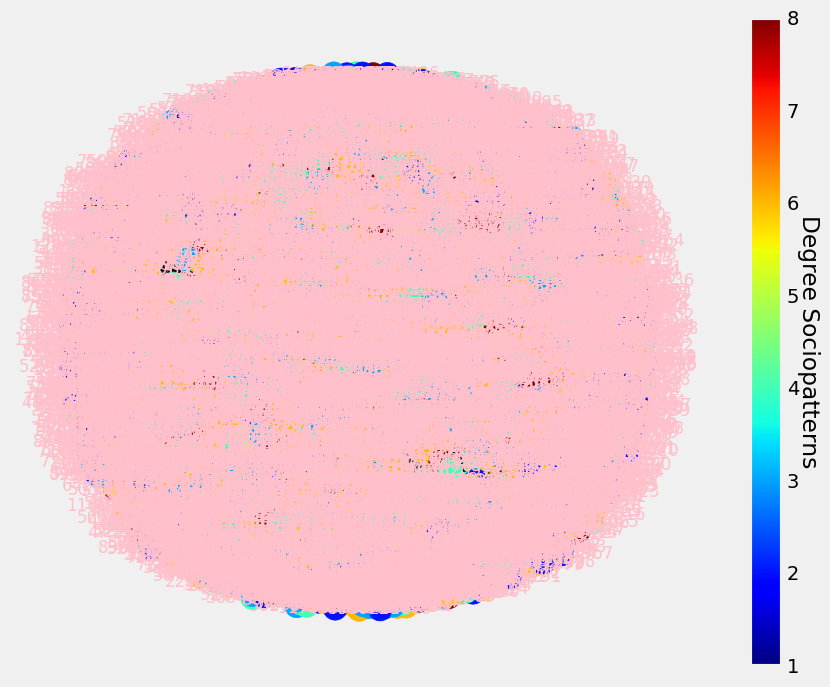

In [77]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G_simple,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(G)).values())

# draw edges
nx.draw_networkx_edges(G_simple,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_simple,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_simple, pos=pos,
                        font_color='pink', ax=ax)

# Criando um ScalarMappable para a colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(color), vmax=max(color)))
sm.set_array([])  # Necessário para evitar erros com o ScalarMappable

# Adicionando a barra de cores
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Degree Sociopatterns', rotation=270, labelpad=15)


plt.axis("off")
plt.savefig('sociopatterns.png', transparent=True,dpi=600)
plt.show()

In [76]:
# How many k-cores does this network have?
set([v for k,v in nx.core_number(G_simple).items()])

{1, 2}

In [78]:
len([G_simple.degree(node) for node in list(nx.k_core(G_simple,1))])

2914

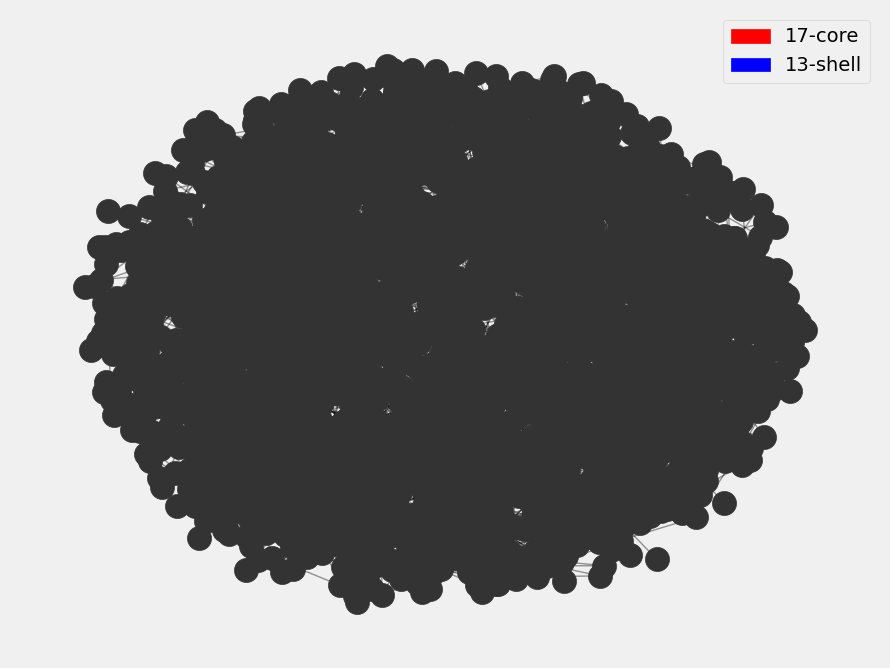

In [80]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
Gsimple_core_13 = nx.k_shell(G_simple, 13)
Gsimple_core_17 = nx.k_core(G_simple, 17)

# layout position
pos = nx.spring_layout(G_simple,seed=123456789,k=0.1)

# draw edges
nx.draw_networkx_edges(G_simple,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_simple,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(Gsimple_core_13,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(Gsimple_core_17,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='17-core')
blue_patch = mpatches.Patch(color='blue', label='13-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()
     